<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/linear_reg_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Regression Analysis?

Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). This technique is used for forecasting, time series modelling and finding the causal effect relationship between the variables. For example, relationship between rash driving and number of road accidents by a driver is best studied through regression.


Regression analysis is an important tool for modelling and analyzing data. Here, we fit a curve / line to the data points, in such a manner that the differences between the distance of data points from the curve or line is minimized. The topic will be explained in detail in coming sections.**bold text**

## Why do we use Regression Analysis?

As mentioned above,Regression analysis estimates the relationship between two or more variables. Let’s understand this with an easy example:

Let’s say, you want to estimate growth in sales of a company based on current economic conditions. You have the recent company data which indicates that the growth in sales is around two and a half times the growth in the economy. Using this insight, we can predict future sales of the company based on current & past information.

There are multiple benefits of using Regression analysis. They are as follows:

   * It indicates the significant relationships between dependent variable and independent variable.
   * It indicates the strength of impact of multiple independent variables on dependent variable.

Regression analysis also allows us to compare the effects of variables measured on different scales, such as the effect of price changes and the number of promotional activities. These benefits help Market Researchers / Data Analysts / Data Scientists to eliminate and evaluate the best set of variables to be used for building predictive models.

# Linear Regression

It is one of the most widely known modeling technique. Linear regression is usually among the first few topics which people pick while learning predictive modeling. In this technique, the dependent variable is continuous, independent variable(s) can be continuous or discrete, and nature of regression line is linear.

Linear Regression establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line).

It is represented by an equation Y=a+b*X + e, where a is intercept, b is slope of the line and e is error term. This equation can be used to predict the value of target variable based on given predictor variable(s).

# Sales -Advertisement

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/datasets/Advertising.csv')

In [ ]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
del data['Unnamed: 0']

In [ ]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
import seaborn as sns

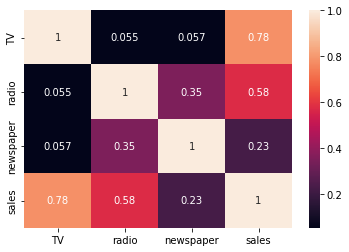

In [ ]:
sns.heatmap(data.corr(),annot= True)

What are the **features**?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [ ]:
# print the shape of the DataFrame
data.shape

(200, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


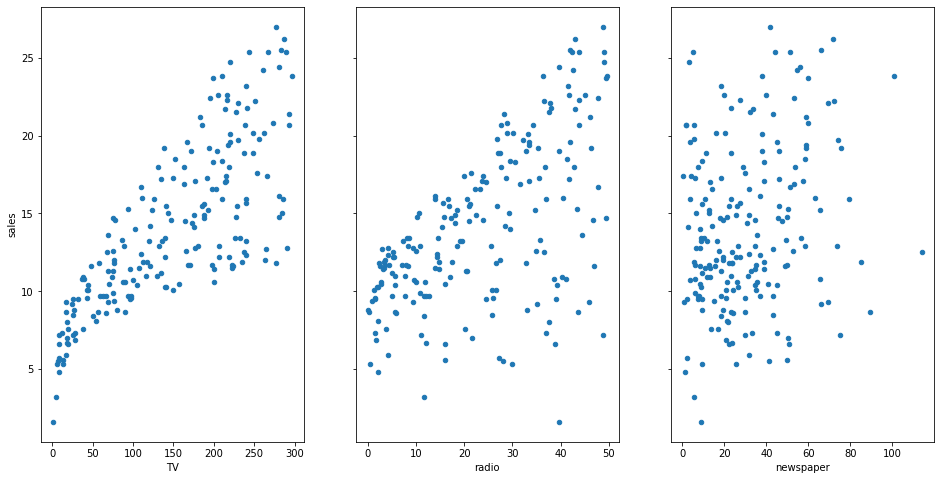

In [ ]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

These general questions might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Simple Linear Regression

Simple Linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## scikit-learn

### Introduction

Since its release in 2007, scikit-learn has become one of the most popular open source Machine Learning libraries for Python. scikit-learn provides algorithms for Machine Learning tasks including classification, regression, dimensionality reduction, and clustering. It also provides modules for extracting features, processing data, and evaluating models.

Conceived as an extension to the SciPy library, scikit-learn is built on the popular Python libraries NumPy and matplotlib. NumPy extends Python to support efficient operations on large arrays and multidimensional matrices. matplotlib provides visualization tools, and SciPy provides modules for scientific computing.

scikit-learn is popular for academic research because it has a well-documented, easy-to-use, and versatile API. Developers can use scikit-learn to experiment with different algorithms by changing only a few lines of the code. scikit-learn wraps some popular implementations of machine learning algorithms, such as LIBSVM and LIBLINEAR. Other Python libraries, including NLTK, include wrappers for scikit-learn. scikit-learn also includes a variety of datasets, allowing developers to focus on algorithms rather than obtaining and cleaning data.

Licensed under the permissive BSD license, scikit-learn can be used in commercial applications without restrictions. Many of scikit-learn's algorithms are fast and scalable to all but massive datasets. Finally, scikit-learn is noted for its reliability; much of the library is covered by automated tests.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [ ]:
# manually calculate the prediction
7.032594+0.047537*50

9.409444

Thus, we would predict Sales of **9,409 widgets** in that market.

In [ ]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
x_new=pd.DataFrame({'TV':[50,60]})

In [ ]:
x_new

,TV
0,50
1,60


In [ ]:
# use the model to make predictions on a new value
lm.predict(x_new)

array([9.40942557, 9.88479198])

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [ ]:
# create a DataFrame with the minimum and maximum values of TV
X_new=pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})

In [ ]:
lm.predict(X_new)

array([ 7.0658692 , 21.12245377])

In [ ]:
X_new

,TV
0,0.7
1,296.4


In [ ]:
# make predictions for those x values and store them
preds=lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

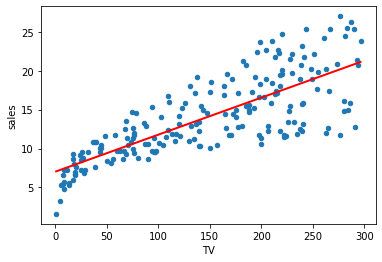

In [ ]:
# first, plot the observed data
data.plot(kind='scatter',x='TV',y='sales')

# then, plot the least squares line
plt.plot(X_new,preds,c='red',linewidth=2)

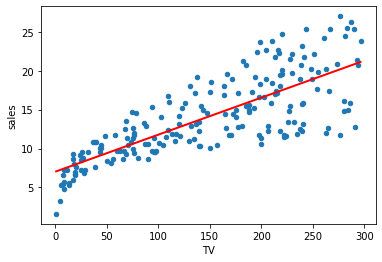

In [ ]:
# first, plot the observed data
data.plot(kind='scatter',x='TV',y='sales')

# then, plot the least squares line
plt.plot(X_new,preds,c='red',linewidth=2)

In [ ]:
preds

array([ 7.0658692 , 21.12245377])

In [ ]:
X_new

,TV
0,0.7
1,296.4


In [ ]:
# print the p-values for the model coefficients
#lm.pvalues

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

<img src="images/08_r_squared.png">

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). (Does the red line look like it's overfitting?)

Let's calculate the R-squared value for our simple linear model:

In [ ]:
# print the R-squared value for the model
#lm.rsquared

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [ ]:
# create X and y

feature_cols=['TV','radio','newspaper']
x=data[feature_cols]
y=data['sales']

lm=LinearRegression()
lm.fit(x,y)

print(lm.coef_)
print(lm.intercept_)

[ 0.04576465  0.18853002 -0.00103749]
2.938889369459412


## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [ ]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [ ]:
y_pred = lm.predict(X)

In [ ]:
from sklearn import metrics

In [ ]:
print('y-intercept             : ', lm.intercept_)
print('beta coefficients       : ', lm.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2 value                : ', metrics.r2_score(y, y_pred))


y-intercept             :  2.938889369459412
beta coefficients       :  [ 0.04576465  0.18853002 -0.00103749]
Mean Abs Error   MAE    :  1.252011229687068
Mean Sq  Error MSE      :  2.784126314510936
Root Mean Sq Error RMSE :  1.6685701407225697
r2 value                :  0.8972106381789522


In [ ]:

# R-squared is a statistical measure of how close the data are to the fitted regression line.
# R-square signifies percentage of variations in the reponse variable that can be explained 
# by the model.
# R-squared = Explained variation / Total variation

# Total variation is variation of response variable around it's mean.
# R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the 
# variability, while 100% signifies that the model explains all the variability of the response. 
# The closer the r-square to 100%, the better is the model.

In [ ]:
import statsmodels.api as sm

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()

In [ ]:
# Reshape the data
#X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [ ]:
y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

In [ ]:
x_scaled=scaler.fit_transform(X)

In [ ]:
y_scaled=scaler.fit_transform(y)

In [ ]:
model=lm.fit(X,y_scaled)

In [ ]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(model.intercept_)

[-2.12966296]


In [ ]:
print(model.coef_)

[[ 0.00879346  0.03622514 -0.00019935]]


In [ ]:
preds =model.predict(X)
preds

array([[ 1.24922732],
       [-0.32369654],
       [-0.32949626],
       [ 0.68698253],
       [-0.1602161 ],
       [-0.29670152],
       [-0.44053907],
       [-0.36498887],
       [-1.97816576],
       [-0.28277078],
       [-1.34313377],
       [ 0.62689865],
       [-0.66201321],
       [-0.99842497],
       [ 0.8477191 ],
       [ 1.30597264],
       [-0.23035202],
       [ 1.76820829],
       [-0.78218827],
       [ 0.02758685],
       [ 0.78361962],
       [ 0.13796762],
       [-1.44749724],
       [ 0.4848656 ],
       [-1.12904177],
       [ 0.30503798],
       [ 0.18580719],
       [ 0.58204124],
       [ 1.03528583],
       [-0.93737593],
       [ 1.46250073],
       [-0.51425887],
       [-1.22658156],
       [ 0.9303227 ],
       [-1.23888896],
       [ 0.57342405],
       [ 1.80297569],
       [ 0.30762025],
       [-0.79045071],
       [ 1.23455434],
       [ 0.45253367],
       [ 0.6289842 ],
       [ 1.45517413],
       [-0.011268  ],
       [-0.98659277],
       [ 0

In [ ]:
print('y-intercept             : ', model.intercept_)
print('beta coefficients       : ', model.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2 value                : ', metrics.r2_score(y, y_pred))

y-intercept             :  [-2.12966296]
beta coefficients       :  [[ 0.00879346  0.03622514 -0.00019935]]
Mean Abs Error   MAE    :  1.252011229687068
Mean Sq  Error MSE      :  2.784126314510936
Root Mean Sq Error RMSE :  1.6685701407225697
r2 value                :  0.8972106381789522


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        06:15:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do I decide **what features has to be included** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** in this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [ ]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.8971942610828956

In [ ]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

So is there a better approach to feature selection? **Cross-validation.** It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

## Handling Categorical Predictors with Two Categories

Up until now, all the predictors have been numeric. What if one of the predictors was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [ ]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

#create a series of boolean where havlf values are true
nums=np.random.rand(len(data))
mask_large=nums>0.5

#initially set size to small then change it to true
data['size']='small'
data.loc[mask_large,'size']='large'
data.head()

,TV,radio,newspaper,sales,size
0,230.1,37.8,69.2,22.1,large
1,44.5,39.3,45.1,10.4,small
2,17.2,45.9,69.3,9.3,small
3,151.5,41.3,58.5,18.5,small
4,180.8,10.8,58.4,12.9,large


In [ ]:
mask_large

array([ True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True, False, False,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True, False,  True, False,  True,  True,
        True, False, False, False,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False, False, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False, False,

For scikit-learn, we need to represent all data **numerically**. If the feature only has two categories, we can simply create a **dummy variable** that represents the categories as a binary value:


In [ ]:
data['isLarge']=data['size'].map({'small':0,'large':1})
data.head()

,TV,radio,newspaper,sales,size,isLarge
0,230.1,37.8,69.2,22.1,large,1
1,44.5,39.3,45.1,10.4,small,0
2,17.2,45.9,69.3,9.3,small,0
3,151.5,41.3,58.5,18.5,small,0
4,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the **IsLarge** predictor:

In [ ]:
#create X and Y

feature_cols=['TV','newspaper','radio','isLarge']
X=data[feature_cols]
y=data['sales']

#insantiatie,fit
lm=LinearRegression()
lm.fit(X,y)

#print coefficients
zip(feature_cols, lm.coef_)

How do we interpret the **IsLarge coefficient**? For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average **increase** in Sales of 57.42 widgets (as compared to a Small market, which is called the **baseline level**).

What if we had reversed the 0/1 coding and created the feature 'IsSmall' instead? The coefficient would be the same, except it would be **negative instead of positive**. As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient.

## Handling Categorical Predictors with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [ ]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,size,isLarge,Area
0,230.1,37.8,69.2,22.1,large,1,rural
1,44.5,39.3,45.1,10.4,small,0,urban
2,17.2,45.9,69.3,9.3,small,0,rural
3,151.5,41.3,58.5,18.5,small,0,urban
4,180.8,10.8,58.4,12.9,large,1,suburban


We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, we create **another dummy variable**:

In [ ]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,size,isLarge,Area,Area_suburban,Area_urban
0,230.1,37.8,69.2,22.1,large,1,rural,0,0
1,44.5,39.3,45.1,10.4,small,0,urban,0,1
2,17.2,45.9,69.3,9.3,small,0,rural,0,0
3,151.5,41.3,58.5,18.5,small,0,urban,0,1
4,180.8,10.8,58.4,12.9,large,1,suburban,1,0


Here is how we interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

Why do we only need **two dummy variables, not three?** Because two dummies captures all of the information about the Area feature, and implicitly defines rural as the baseline level. (In general, if you have a categorical feature with k levels, you create k-1 dummy variables.)

If this is confusing, think about why we only needed one dummy variable for Size (IsLarge), not two dummy variables (IsSmall and IsLarge).

Let's include the two new dummy variables in the model:

In [ ]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'isLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print(feature_cols, lm.coef_)

['TV', 'radio', 'newspaper', 'isLarge', 'Area_suburban', 'Area_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


How do we interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 268.13 widgets (as compared to rural).

**A final note about dummy encoding:** If you have categories that can be ranked (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can potentially use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).

# Chi square Linear reg

CHI SQUARE TESTS
To compare the actual vs expected results
The observed and expected frequencies should be >5
we use the chisquare function:

In [ ]:
die_expected = [100,100,100,100,100,100]
die_actual =  [106,150,119,87,101,37]

The chisquare method gives two values:
    
    1. Chi square statistic
    2. p value


In [ ]:
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [ ]:
stats.chisquare(die_actual, die_expected)

Power_divergenceResult(statistic=70.36, pvalue=8.624026328466518e-14)

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
voters=pd.read_csv('/content/drive/MyDrive/datasets/Voting_pattern.csv')

In [ ]:
voters.head()

,RACE,PARTY
0,WHITE,REPUBLICAN
1,WHITE,REPUBLICAN
2,WHITE,DEMOCRAT
3,HISPANIC,DEMOCRAT
4,ASIAN,DEMOCRAT


In [ ]:
voters.shape

(1000, 2)

In [ ]:
voter_tab=pd.crosstab(voters.RACE,voters.PARTY)
voter_tab

PARTY,DEMOCRAT,INDEPENDENT,REPUBLICAN
RACE,,,
ASIAN,19,8,15
BLACK,60,32,59
HISPANIC,105,45,86
OTHER,12,8,17
WHITE,207,100,227


In [ ]:
stats.chi2_contingency(voter_tab)

(4.73783947307747, 0.7851934085104636, 8, array([[ 16.926,   8.106,  16.968],
        [ 60.853,  29.143,  61.004],
        [ 95.108,  45.548,  95.344],
        [ 14.911,   7.141,  14.948],
        [215.202, 103.062, 215.736]]))

In [ ]:
chi_square , p_value,degrees_of_freedom,expected_frequencies= stats.chi2_contingency(voter_tab)

In [ ]:
chi_square 

4.73783947307747

In [ ]:
p_value

0.7851934085104636

In [ ]:
degrees_of_freedom

8

In [ ]:
expected_frequencies

array([[ 16.926,   8.106,  16.968],
       [ 60.853,  29.143,  61.004],
       [ 95.108,  45.548,  95.344],
       [ 14.911,   7.141,  14.948],
       [215.202, 103.062, 215.736]])

Linear regression

Assumptions:
1. linearity and additivity of the relationship between dependent and independent variables:
2. statistical independence of the errors
3. constant variance of the errors
4. normality of the error distribution.

In [ ]:
hsg=pd.read_csv('/content/drive/MyDrive/datasets/Housing_data.csv')

In [ ]:
hsg.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0


In [ ]:
hsg.shape

(1047, 7)

In [ ]:
hsg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1047 non-null   int64  
 1   LivingArea  1047 non-null   int64  
 2   Bathrooms   1047 non-null   float64
 3   Bedrooms    1047 non-null   int64  
 4   LotSize     1047 non-null   float64
 5   Age         1047 non-null   int64  
 6   Fireplace   1047 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 57.4 KB


In [ ]:
lv= hsg['LivingArea']

In [ ]:
price=hsg['Price']

Text(0, 0.5, 'Price')

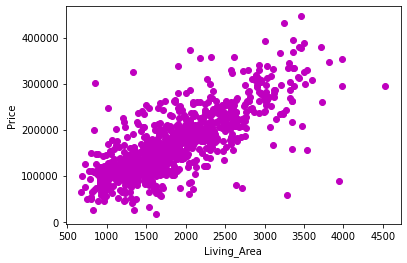

In [ ]:
plt.scatter(lv,price,c='m')
plt.xlabel('Living_Area')
plt.ylabel('Price')

In [ ]:
corr_coef_=hsg.corr()
corr_coef_

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
Price,1.000000,0.776396,0.670189,0.471074,0.155284,-0.363354,0.460237
LivingArea,0.776396,1.000000,0.722649,0.664347,0.200180,-0.263168,0.481436
Bathrooms,0.670189,0.722649,1.000000,0.491798,0.100993,-0.443830,0.444700
Bedrooms,0.471074,0.664347,0.491798,1.000000,0.140682,-0.060598,0.295873
LotSize,0.155284,0.200180,0.100993,0.140682,1.000000,0.015135,0.052765
Age,-0.363354,-0.263168,-0.443830,-0.060598,0.015135,1.000000,-0.248794
Fireplace,0.460237,0.481436,0.444700,0.295873,0.052765,-0.248794,1.000000


In [ ]:
import seaborn as sns

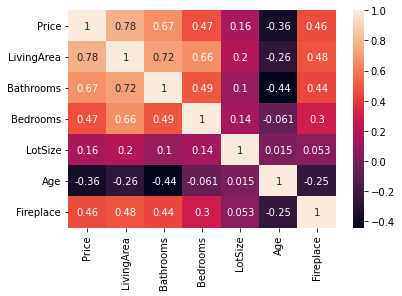

In [ ]:
sns.heatmap(data=corr_coef_,annot=True)

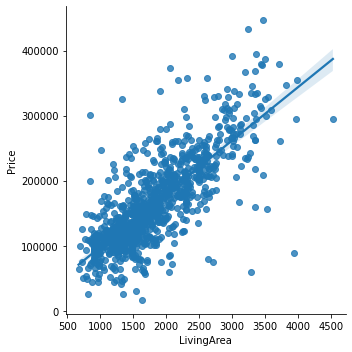

In [ ]:
sns.lmplot(x='LivingArea',y='Price',data=hsg, )

In order to make a linear regression model , import the module from Scikit learn package

In [ ]:
from sklearn import linear_model

In [ ]:
# Initialize model
regression_model = linear_model.LinearRegression()

regression_model.fit() -> fits a linear model
In other words, the first step is for the model to "Learn " the data and derive the coefficients.
it is called as fitting the model

In [ ]:
# Train the model using the housing data
regression_model.fit(X=hsg[['LivingArea']], y=hsg['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Check trained model y-intercept
print(regression_model.intercept_)

15875.636989985855


In [ ]:
# Check trained model coefficients
print(regression_model.coef_)

[81.88251056]


### Prediction for a single Independent variable value using coefficients

In [ ]:
b0=15880
b1 = 81.8825

price_pred = b0 +(b1* 1629)
price_pred

149266.5925

### R square

R square is a measure of how well your model fits the data

Rsquare=1-(SSResiduals/SS Total)

We can find the R square using the score method in regression model


### Linear Regression.score()
The output of the score function for linear regression is "R-squared".

The value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model. 

In this case, Living Area explains roughly 60% of the variance in House prices

In [ ]:
regression_model.score(X = hsg[['LivingArea']],
                     y = hsg["Price"])

0.6027914477336614

### Prediction


For Predicting the output, we use the predict method over the regression model

regression_model.predict :-

It predicts Y using the linear model with estimated coefficients

In [ ]:
train_prediction = regression_model.predict(X = hsg[['LivingArea']])

train_prediction

array([149262.24668738, 125925.73117862,  83183.06066786, ...,
       291082.75497214, 281993.79630031, 299762.30109119])

Now that we have created the regression output, let us plot the best fit line

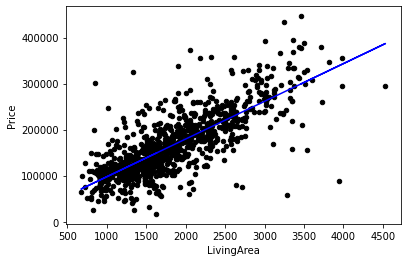

In [ ]:
# Having a scatter plot of Living area vs Price

hsg.plot(kind="scatter", x="LivingArea", y="Price", figsize=(6,4), color="black")

# Plot regression line
plt.plot(hsg["LivingArea"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue")

## Residual calculation
We can extract the model's residuals by making a prediction with the model on the 
data and then subtracting the actual value from each prediction:

In [ ]:
# Actual - prediction = residuals
residuals=hsg['Price']-train_prediction

residuals.describe()

count    1.047000e+03
mean     1.634484e-11
std      4.263705e+04
min     -2.507283e+05
25%     -2.083217e+04
50%     -1.748463e+03
75%      1.854249e+04
max      2.157009e+05
Name: Price, dtype: float64

## How to get R squared

R-squared =1 - (SSResiduals/SSTotal)

were SSResiduals is the sum of the squares of the model residuals 
SSTotal = the sum of the squares of the difference between each data point and the mean of the data.

In [ ]:
SSResiduals=(residuals**2).sum()

In [ ]:
SSResiduals

1901541869645.2004

In [ ]:
SSR=((train_prediction-hsg['Price'].mean())**2).sum()

In [ ]:
TSS=SSR+SSResiduals
TSS

4787263161368.607

In [ ]:
SSR/TSS

0.6027914477336613

## Check the normality of residuals

In a well-behaved linear regression model, we'd like the residuals to be roughly normally distributed. 

we'd like a roughly even spread of error above and below the regression line. 

We can investigate the normality of residuals with a Q-Q (quantile-quantile) plot.

We can Make a qqplot by passing the residuals to the stats.probplot() function in the scipy.stats library:

When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot

In [ ]:
from scipy import stats

((array([-3.21080761, -2.94660583, -2.79923536, ...,  2.79923536,
          2.94660583,  3.21080761]),
  array([-250728.25862689, -225856.68416981, -163191.4755784 , ...,
          188837.15628366,  201878.1540114 ,  215700.87656822])),
 (41381.230651304744, 9.830407546770313e-12, 0.9684184189670919))

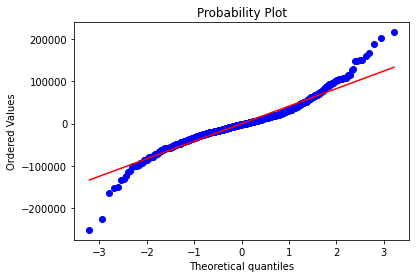

In [ ]:
plt.figure(figsize=(6,4))

stats.probplot(residuals, dist="norm", plot=plt)

In [ ]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction,hsg['Price'])**0.5

RMSE

42616.67920387508

# Sales_liner_reg

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# imort the dataset of flat prices
flatdata = pd.read_csv ('/content/drive/MyDrive/datasets/Price.csv')

In [ ]:
flatdata.head()

,Area (sqft),Price ($)
0,2000,88600
1,1600,71600
2,1980,93300
3,1840,84300
4,1710,80600


In [ ]:
x=flatdata.iloc[:,:-1].values
y=flatdata.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=1/4, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictValues= model.predict(X_test)

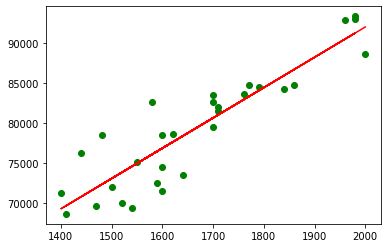

In [ ]:
# So now let us visualize the Training set
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,model.predict(X_train),color='red')

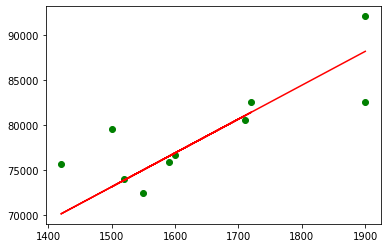

In [ ]:
plt.scatter(X_test,y_test,color='green')
plt.plot(X_test,model.predict(X_test),color='red')

# Boston Housing

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston=load_boston()

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'No. of houses')

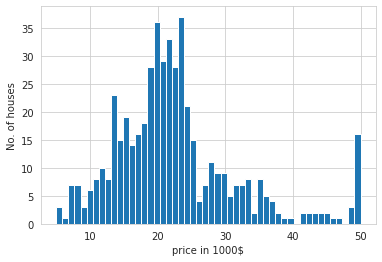

In [ ]:
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target,bins=50)

plt.xlabel('price in 1000$')
plt.ylabel('No. of houses')

Text(0, 0.5, 'pricing')

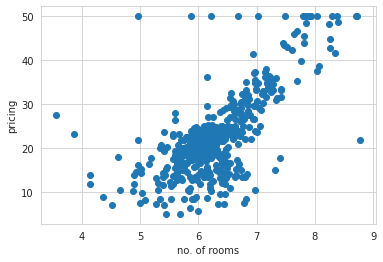

In [ ]:
# Plot the column at the 5 index (Labeled RM)
plt.scatter(boston.data[:, 5], boston.target)

plt.xlabel('no. of rooms')
plt.ylabel('pricing')

Great! Now we can make out a slight trend that price increases along with the number of rooms in that house, which intuitively makes sense! Now let's use scikit learn to see if we can fit the data linearly.

Let's try to do the following:

    1.) Use pandas to transform the boston dataset into a DataFrame: 
    
    2.) Then use seaborn to perform an lmplot on that DataFrame to reproduce the scatter plot with a linear fit line.

In [ ]:
#reset data as pandas DataFrame

boston_df=DataFrame(boston.data)

#label columns
boston_df.columns=boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now let's add the target of the boston data set, the price. We'll create a new column in our DataFrame.

In [ ]:
# Set price column for target
boston_df['Price']=boston.target

In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


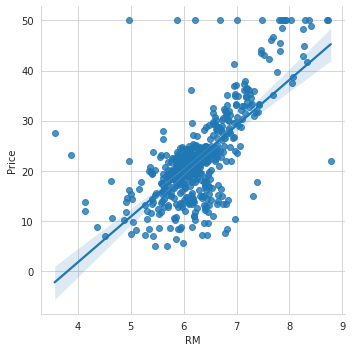

In [ ]:
# Using seabron to create a linear fit
sns.lmplot('RM','Price',data=boston_df)

### Step 3: The mathematics behind the Least Squares Method.

In this particular lecture we'll use the least squares method as the way to estimate the coefficients. Here's a quick breakdown of how this method works mathematically:

Take a quick look at the plot we created above using seaborn. Now consider each point, and know that they each have a coordinate in the form (X,Y). Now draw an imaginary line between each point and our current "best-fit" line. We'll call the distanace between each point and our current best-fit line, D. To get a quick image of what we're currently trying to visualize, take a look at the picture below:

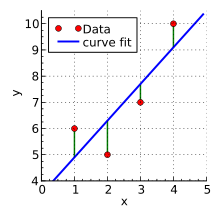

In [ ]:
# Quick display of image form wikipedia
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

Now as before, we're labeling each green line as having a distance D, and each red point as having a coordinate of (X,Y). Then we can define our best fit line as the line having the property were:
$$ D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$

So how do we find this line? The least-square line approximating the set of points:

$$ (X,Y)_{1},(X,Y)_{2},(X,Y)_{3},(X,Y)_{4},(X,Y)_{5}, $$

has the equation:
$$ Y = a_{0} +a_{1}X $$
this is basically just a rewritten form of the standard equation for a line:
$$Y=mx+b$$

We can solve for these constants a0 and a1 by simultaneously solving these equations:
$$ \Sigma Y = a_{0}N + a_{1}\Sigma X $$
$$ \Sigma XY = a_{0}\Sigma X + a_{1}\Sigma X^2 $$

These are called the normal equations for the least squares line. There are further steps that can be taken in rearranging these equations  to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here. If you want further informatino on the mathematics of the above formulas, check out this great [video](https://www.youtube.com/watch?v=Qa2APhWjQPc).

For now, we'll use numpy to do a simple single variable linear regression. Afterwards we'll unleash the power of scikit learn to do a full multivariate linear regression.

### Step 4: Using Numpy for a Univariate Linear Regression

Numpy has a built in Least Square Method in its linear algebra library. We'll use this first for our Univariate regression and then move on to scikit learn for out Multi variate regression.

We will start by setting up the X and Y arrays for numpy to take in. An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to create a (506,1) shape array. There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack tool, vstack.

In [ ]:
# Set up X as median room values
X = boston_df.RM

# Use v to make X two-dimensional
X = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses.
Y= boston_df.Price

Now that we have our X and Y, let's go ahead and use numpy to create the single variable linear regression.

We know that a line has the equation:
$$y=mx+b$$
which we can rewrite using matrices:
$$y=Ap$$
where:
$$A = \begin{bmatrix}x & 1\end{bmatrix}$$
and
$$p= \begin{bmatrix}m \\b\end{bmatrix}$$

This is the same as the first equation if you carry out the linear algebra. 
So we'll start by creating the A matrix using numpy. We'll do this by creating a matrix in the form [X 1], so we'll call every value in our original X using a list comprehension and then set up an array in the form [X 1]

In [ ]:
# Create the X array in the form [X 1]
X = np.array([[value,float(1)] for value in X ]) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
X = X.astype(np.float64)

In [ ]:
# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y, rcond=None)[0]

In [ ]:
m

9.102108981180313

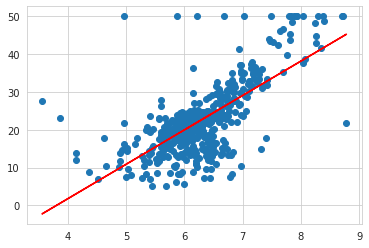

In [ ]:
# First the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Next the best fit line
x=boston_df.RM
plt.plot(x,m*x+b,'r',label='best fit line')

Great! We've just completed a single variable regression using the least squares method with Python! Let's see if we can find the error in our fitted line. Checking out the documentation [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html), we see that the resulting array has the total squared error. For each element, it checks the the difference between the line and the true value (our original D value), squares it, and returns the sum of all these. This was the summed D^2 value we discussed earlier. 

It's probably easier to understand the root mean squared error, which is similar to the standard deviation. In this case, to find the root mean square error we divide by the number of elements and then take the square root. There is also an issue of bias and an unbiased regression, but we'll delve into those topics later.

For now let's see how we can get the root mean squared error of the line we just fitted.

In [ ]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 6.60 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [ ]:
result

(array([  9.10210898, -34.67062078]),
 array([22061.87919621]),
 2,
 array([143.99484122,   2.46656609]))

In [ ]:
X

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [ ]:
max(boston_df.RM)

8.78

Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time. Note: Review the Normal Distribution Appendix lecture if this doesn't make sense to you or check out this [link](http://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule).

Thus we can reasonably expect a house price to be within $13,200 of our line fit.



### Step 6: Using scikit learn to implement a multivariate regression

Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!

We'll start by importing the [linear regression library](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the sklearn module.

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [ ]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

Next, we create a LinearRegression object, afterwards, type lm. then press tab to see the list of methods availble on this object.

In [ ]:
# Create a LinearRegression Object
lreg=LinearRegression()

The functions we will be using are:

lreg.fit() which fits a linear model

lreg.predict() which is used to predict Y using the linear model with estimated coefficients

lreg.score() which returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, learn more about it [here](http://en.wikipedia.org/wiki/Coefficient_of_determination)

We'll start the multi variable regression analysis by seperating our boston dataframe into the data columns and the target columns:

In [ ]:
X_multi=boston_df.drop('Price',1)
Y_targets=boston_df.Price

In [ ]:
lreg.fit(X_multi,Y_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#lets check the intercept
print('the estimated intercept coeffecient is %.2f ' %lreg.intercept_)

the estimated intercept coeffecient is 36.46 


In [ ]:
print('no. of coeffecients used is %d ' %len(lreg.coef_))

no. of coeffecients used is 13 


Great! So we have basically made an equation for a line, but instead of just oneo coefficient m and an intercept b, we now have 13 coefficients. To get an idea of what this looks like check out the [documentation](http://scikit-learn.org/stable/modules/linear_model.html) for this equation:
$$ y(w,x) = w_0 + w_1 x_1 + ... + w_p x_p $$

Where $$w = (w_1, ...w_p)$$ as the coefficients and $$ w_0 $$ as the intercept 

What we'll do next is set up a DataFrame showing all the Features and their estimated coefficients obtained form the linear regression.

In [ ]:
#set a DataFrame from the  features
coeff_df= DataFrame(boston_df.columns)
coeff_df.columns=['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df['Coeffecient Estimate']=pd.Series(lreg.coef_)

In [ ]:
coeff_df

,Features,Coeffecient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Just like we initially plotted out, it seems the highest correlation between a feature and a house price was the number of rooms.

Now let's move on to Predicting prices!

### Step 7: Using Training and Validation 

In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is *randomly*.

Fortunately, scikit learn has a built in function specifically for this called train_test_split.

The parameters passed are your X and Y, then optionally test_size parameter, representing the proportion of the dataset to include in the test split. As well a train_size parameter. ou can learn more about these parameters [here](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

In [ ]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)

In [ ]:
# Print shapes of the training and testing data sets
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


Great! Now that we have our training and testing sets we can continue on to predicint gprices based on the multiple variables.

### Step 8: Predicting Prices

Now that we have our training and testing sets, let's go ahead and try to use them to predict house prices. We'll use our training set for the prediction and then use our testing set for validation.

In [ ]:
# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Now run a prediction on both the X training set and the testing set.
# Predictions on training and testing sets
pred_train=lreg.predict(X_train)
pred_test=lreg.predict(X_test)

In [ ]:
#Now we will get the mean square error

print("Fit a model X_train, and calculate MSE with Y_train: %.2f " %np.mean((Y_train-pred_train)**2))

print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f " %np.mean((Y_test-pred_test)**2))

Fit a model X_train, and calculate MSE with Y_train: 48.94 
Fit a model X_train, and calculate MSE with X_test and Y_test: 27.80 


It looks like our mean square error between our training and testing was pretty close. But how do we actually visualize this?

### Step 9 : Residual Plots

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:

$$Residual = Observed\:value - Predicted\:value $$

You can think of these residuals in the same way as the D value we discussed earlier, in this case however, there were multiple data points considered.

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are a good way to visualize the errors in your data.  If you have done a good job then your data should be randomly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and check your data set closely.

So now let's go ahead and create the residual plot. For more info on the residual plots check out this great [link](http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis).

Text(0.5, 1.0, 'Residual Plots')

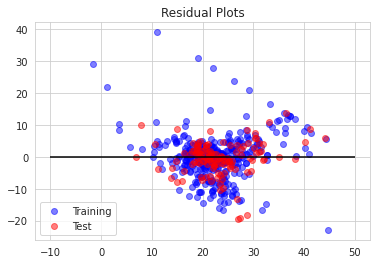

In [ ]:
# Scatter plot the training data
train=plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test=plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

Great! Looks like there aren't any major patterns to be concerned about, it may be interesting to check out the line occuring towards the bottom right, but overall the majority of the residuals seem to be randomly allocated above and below the horizontal. We could also use seaborn to create these plots:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


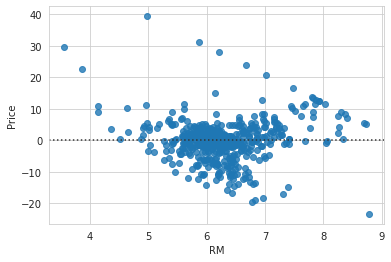

In [ ]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM','Price',data=boston_df)

That's it for this lesson. Linear regression is a very broad topic, theres a ton of great information in the sci kit learn documentation, and I encourage you to check it out here:  http://scikit-learn.org/stable/modules/linear_model.html#linear-model